In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("income.csv")

In [4]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [5]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


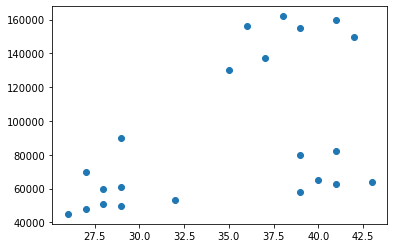

In [15]:
# plot the scatter plot

plt.scatter(df['Age'], df["Income($)"]) 

#here we got 3 clusters

In [12]:
from sklearn.cluster import KMeans

In [19]:
km = KMeans(n_clusters = 3)

In [20]:
km

KMeans(n_clusters=3)

In [23]:
y_pred =km.fit_predict(df[['Age', "Income($)"]])

In [24]:
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [26]:
df['cluster'] = y_pred
df

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [27]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


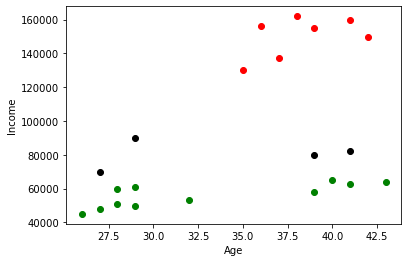

In [39]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color = 'green' )
plt.scatter(df2.Age, df2['Income($)'], color = 'red')
plt.scatter(df3.Age, df3['Income($)'], color = 'black')

# plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker ='+', label ='centroid')

plt.xlabel('Age')
plt.ylabel('Income')

plt.show()

as we see the black and green cluster is not group correctly because our scaling is not right so we used the min-max scaler

In [40]:
from  sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()

In [49]:
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [51]:
df

#here income and age scale between 0 to 1

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


once again  use the kmeans algorithm for our scale dataset


In [54]:
km = KMeans(n_clusters = 3)

In [55]:
y_pred = km.fit_predict(df[['Age', 'Income($)']])

In [56]:
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [57]:
df['cluster'] = y_pred

In [59]:
df # here we got new cluster result

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


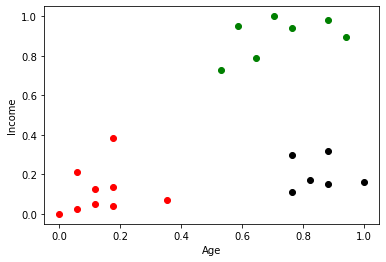

In [61]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color = 'green' )
plt.scatter(df2.Age, df2['Income($)'], color = 'red')
plt.scatter(df3.Age, df3['Income($)'], color = 'black')

# plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker ='+', label ='centroid')

plt.xlabel('Age')
plt.ylabel('Income')

plt.show()

#here we got very good clustering

In [65]:
#here we also check the centroids

km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

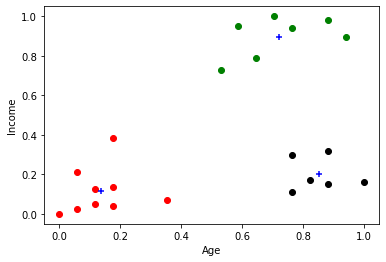

In [67]:
#plots the centroids

df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color = 'green' )
plt.scatter(df2.Age, df2['Income($)'], color = 'red')
plt.scatter(df3.Age, df3['Income($)'], color = 'black')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'blue', marker ="+", label ="centroid")
#for X_axis -km.cluster_centers_[:,0] : all the rows with 1st column
#for y_axis - km.cluster_centers_[:,1]
plt.xlabel('Age')
plt.ylabel('Income')

plt.show()


In [72]:
# elbow method

k_rng = range(1, 10)
wcss = []

for k in k_rng:
    km = KMeans(n_clusters= k)
    km.fit(df[['Age', 'Income($)']])
    wcss.append(km.inertia_) #inertia_ is the wcss distances to closest centroid

C:\Users\suyash\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [73]:
wcss

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419565,
 0.2664030124668415,
 0.21878010893330443,
 0.1731082142499349,
 0.13937852495507838,
 0.10497488680620906]

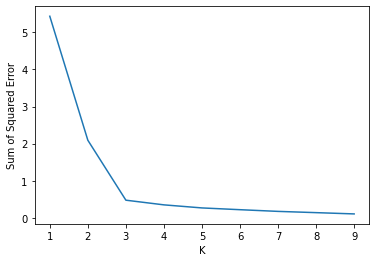

In [74]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng, wcss)

#here we get the elbow =3 so as we got k = 3